## Aprendizagem Supervisionada

#### Conceito

 > Tipo de `aprendizagem de máquina` formado por algoritmos que simulam aprendizado com dados previamente rotulados. De modo iterativo, cada amostra é apresentada ao algoritmo e o mesmo gera como saída um possível rótulo para a amostra. O rótulo predito é comparado com o rótulo real e caso o algoritmo erre, um ajuste é feito para que a saída predita se aproxime ao máximo da saída real.


#### Rótulo:
- **Discreto:** Classificação
- **Contínuo:** Regressão

<img src="https://s3-sa-east-1.amazonaws.com/lcpi/df1dafe9-7c7e-4dec-a8fe-13cff93ab684.png" width=400>

#### Ex.: Temperatura de um ambiente

<img src="https://s3-sa-east-1.amazonaws.com/lcpi/788cdc1b-20df-407a-82f3-776de685628e.jpg" width="400">    

### Features - Características dos dados

 - Desempenho → Métrica 
 - Treinamento e teste → Experiência
     - **Features**: Características do objeto alvo da análise
     - **Target**: Classe ou valor do objeto

<img src="https://s3-sa-east-1.amazonaws.com/lcpi/39eea9b9-6906-42e0-9ef1-e7aee4293aa3.jpg" width=700>

### Construção de um modelo de machine learning

**Passo 1**: Formulação de hipótese
 - Disponibilidade dos dados
 - Padrão nos dados
 - Oportunidade de negócio
 - Viabilidade do modelo
 - EDA
    

**Passo 02**: Construção do experimento
 - **Coleta de dados**
  - Técnicas de amostragem 
 - Pré-processamento dos dados
 - Definição de métricas
 - Seleção de modelo(s)
     - Modelo paramétrico ou não paramétrico?
     - Conjunto de parâmetros
     - Conjunto de hiperparâmetros
        

**Passo 03**: Construção do modelo
 - Escolha de ferramentas
 - Ambiente de execução
 - Forma de monitoramento do treinamento


**Passo 04**: Avaliação dos resultados
 - Teste
 - Comparativo
 - **Monitoramento**
     - Métricas de monitoramento
     - Drift

## Desenvolvimento de um modelo

### 1. Regressão

In [23]:
# Fazer previsões
y_pred = model.predict(X_test)

In [22]:
# Criar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

<img src = "https://s3-sa-east-1.amazonaws.com/lcpi/a272534b-ac56-4c2e-be0b-3ea95ada54dc.gif">

#### Regressão Linear

In [19]:
# Criar o dataframe
data = {
    'idade': [18, 23, 28, 33, 38, 43, 48, 53, 58, 63],
    'custo': [871, 1132, 1242, 1356, 1488, 1638, 2130, 2454, 3066, 4090]
}

df = pd.DataFrame(data)
df

,idade,custo
0,18,871
1,23,1132
2,28,1242
3,33,1356
4,38,1488
5,43,1638
6,48,2130
7,53,2454
8,58,3066
9,63,4090


In [20]:
# Separar os dados de entrada (X) e saída (y)
X = df[['idade']]
y = df['custo']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [24]:
mae = mean_absolute_error(y_pred, y_test)
mae

190.375

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

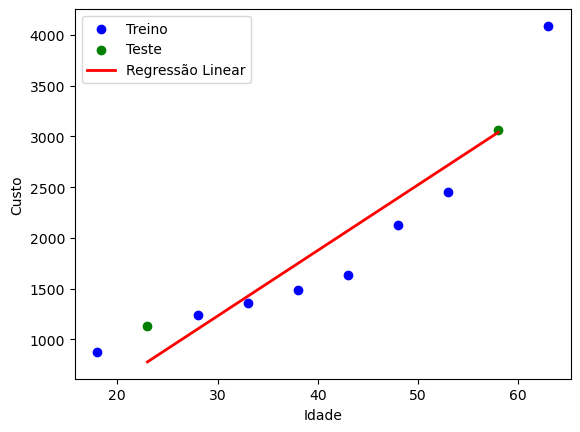

In [25]:
# Plotar os resultados
plt.scatter(X_train, y_train, color='blue', label='Treino')
plt.scatter(X_test, y_test, color='green', label='Teste')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regressão Linear')
plt.xlabel('Idade')
plt.ylabel('Custo')
plt.legend()
plt.show()

### 2. Classsificação

In [1]:
import pandas as pd

<img src="https://s3-sa-east-1.amazonaws.com/lcpi/37621853-e789-4ccd-aff2-4f3078556cfb.jpg" width=300>

In [2]:
# Carregar o dataset de câncer de mama
data = load_breast_cancer()

#### Lista de features

In [ ]:
data.feature_names.tolist()

#### Quantidade de features?

In [ ]:
len(data.feature_names.tolist())

#### Diagnóstico

In [ ]:
df_target = pd.DataFrame(data = data.target, columns = ['diagnosis'])
df_target

#### Dividir o dataset em conjunto de treinamento e teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.data, 
                                                    data.target, 
                                                    test_size=0.2, 
                                                    random_state=42)

#### Criar e treinar o modelo de regressão logística
Intuição

<img src = "https://s3-sa-east-1.amazonaws.com/lcpi/b92ec6a5-91b2-45f5-ad65-75978d6f54cc.png" width=400>

In [ ]:
model = LogisticRegression(max_iter=1_000_000)
model.fit(X_train, y_train)

#### Testar o modelo

In [ ]:
y_pred = model.predict(X_test)

#### Avaliar o modelo

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
matrix = confusion_matrix(y_test, y_pred)
matrix

In [ ]:
plt.figure(figsize=(4, 3), dpi=80)
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de confusão')
plt.show()

#### Acurácia (Accuracy)

<img src="https://s3-sa-east-1.amazonaws.com/lcpi/8aa5276a-ef3e-4529-aaec-d13944de905d.png" width=300>

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)

#### Probabilidade

In [ ]:
y_pred = model.predict(X_test)
y_pred